# Inaugural Project

In [45]:
#First we import all the packages that we are going to use in the following project
from scipy import optimize
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Question 1

In [46]:
# Here we specify the parameter-values stated in the Inagural project destription
w = 1
m = 1
V = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

# We then specify the utility-function, and afterwards, the optimizing choice given the expression of the constraint. 
# Note that we initially substitute c for x in the constraint expression, given the monotonic preferences
def u_func(l,c,V,epsilon):
    return np.log(c) - V*(l**(1+1/epsilon)/(1+1/epsilon))

def value_of_choice(l,m,V,epsilon,tau0,tau1,kappa):
    c = m + w*l - tau0*w*l - tau1*max(w*l-kappa,0)
    return -u_func(l,c,V,epsilon)

# Here we define the the solution and the scipy.optimize method 'bounded', 
# define the bounds from the description, and specify the arguments (parameters)
sol_case1 = optimize.minimize_scalar(
value_of_choice,method='bounded',
bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))

# We then unpack all the solutions
l_svar = sol_case1.x
c_svar = m + w*l_svar - tau0*w*l_svar - tau1*max(w*l_svar-kappa,0)
u = u_func(l_svar,c_svar,V,epsilon)


In [47]:
# Here we specify the parameter-values stated in the Inagural project destription
w = 1 
m = 1
V = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1 
kappa = 0.4

# We then specify the utility-function, and afterwards, the optimizing choice given the expression of the constraint. 
# Note that we initially substitute c for x in the constraint expression, given the monotonic preferences
def u_func(l,c,V,epsilon):
    return np.log(c) - V*(l**(1+1/epsilon)/(1+1/epsilon))

def value_of_choice(l,m,V,epsilon,tau0,tau1,kappa):
    c = m + w*l - tau0*w*l - tau1*max(w*l-kappa,0)
    return -u_func(l,c,V,epsilon)

# Here we define the the solution and the scipy.optimize method 'bounded', 
# define the bounds from the description, and specify the arguments (parameters)
sol_case1 = optimize.minimize_scalar(
value_of_choice,method='bounded',
bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))

# We then unpack all the solutions
l_svar = sol_case1.x
c_svar = m + w*l_svar - tau0*w*l_svar - tau1*max(w*l_svar-kappa,0)
u = u_func(l_svar,c_svar,V,epsilon)


# Question 2

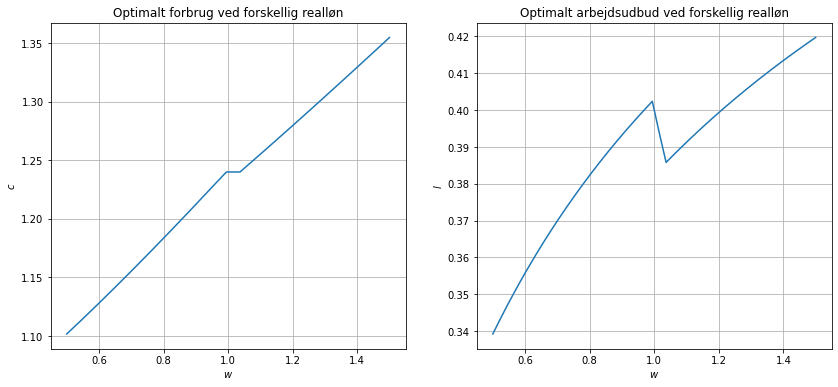

In [48]:
# In this question we want to find the utility maximizing values of c & l, given different values of w. 

# We create empty lists for our values of l, c & w, so that we can later plot them graphically.
w_values = []
l_values = []
c_values = []

# The next lines of code uses the same method of optimization as in question 1. Only this time, we use a for loop to maximize 
# over a 10000 different values of w, that we have spaced linearly between 0.5 & 1.5. 
for w in np.linspace(0.5,1.5,10000):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice, method='bounded',
    bounds=(0,1), args=(m, V, epsilon, tau0, tau1, kappa))
    
    l_svar = sol_case1.x
    c_svar = m + w*l_svar - tau0*w*l_svar - tau1*np.fmax(w*l_svar-kappa,0)
    
    # Now that we have created our values with the loop, we append them to our empty lists.
    w_values.append(w)
    l_values.append(l_svar)
    c_values.append(c_svar)

# We create our figure and specify the dimensions
fig = plt.figure(figsize=(14,6))

# We generate our first figure (left) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,1)

# Here we plot the values for w on the x-axis and the values for c on the y-axis
ax_left.plot(w_values,c_values)

# We set the diagram-title and the titles of axis as well as adding a grid. 
ax_left.set_title('Optimalt forbrug ved forskellig realløn')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$c$')
ax_left.grid(True)

# We generate our second figure (right) with 1 row and 2 columns
ax_left = fig.add_subplot(1,2,2)

# Here we plot the values for w on the x-axis and the values for l on the y-axis
ax_left.plot(w_values,l_values)

# We set the diagram-title and the titles of axis as well as adding a grid. 
ax_left.set_title('Optimalt arbejdsudbud ved forskellig realløn')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l$')
ax_left.grid(True)

# Question 3

In [50]:
# We define parameters
m = 1
V = 10
epsilon = 0.3
tau0 = 0.4
tau1 = 0.1
kappa = 0.4

# We now define empty lists
w_values = []
l_values = []
c_values = []


# And set the seed
np.random.seed(2020)

# We now loop through all possible c* and l* values
for w in np.random.uniform(low=0.5,high=1.5,size=10000):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))
    
    l_svar = sol_case1.x
    c_svar = m + w*l_svar - tau0*w*l_svar - tau1*np.fmax(w*l_svar-kappa,0)
    
# And append w and l* values
    w_values.append(w)
    l_values.append(l_svar)
    c_values.append(c_svar)

# We now define w and l* as arrays
w_i = np.array(w_values)
l_i = np.array(l_values)
c_i = np.array(c_values)

# Define the parameters as arrays
elements = 10000
tau0_i = np.array([tau0] * elements)
tau1_i = np.array([tau1] * elements)
kappa_i = np.array([kappa] * elements)

# At last we calculate total revenue with the given formula
T = sum(tau0_i*w_i*l_i+tau1_i*np.fmax(w_i*l_i-kappa_i,0))
print(f'T = {T:5f}')


T = 1621.349641


# Question 4

In [51]:
# Here we ammend the parameter-value of epsilon
epsilon = 0.1

# We define new empty lists
w_values = []
l_values = []
c_values = []

# And use the same seed as before
np.random.seed(2020)

# We now loop through all possible c* and l* values
for w in np.random.uniform(low=0.5,high=1.5,size=10000):
    sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))
    
    l_svar = sol_case1.x
    c_svar = m + w*l_svar - tau0*w*l_svar - tau1*max(w*l_svar-kappa,0)
    
# And append w and l* values
    w_values.append(w)
    l_values.append(l_svar)
    c_values.append(c_svar)

# We now define w and l* as arrays
w_i = np.array(w_values)
l_i = np.array(l_values)
c_i = np.array(c_values)
 
# And define parameters as arrays
elements = 10000
tau0_i = np.array([tau0] * elements)
tau1_i = np.array([tau1] * elements)
kappa_i = np.array([kappa] * elements)

# And at last calculate the new total revenue with the given formula
T = sum(tau0_i*w_i*l_i+tau1_i*np.fmax(w_i*l_i-kappa_i,0))
print(f'T = {T:5f}')

T = 3181.160000


# Question 5

In [52]:
# We define the wage as a uniform stochastic variable, and define the labour and tax as a zeros-list
w_i = np.random.uniform(low=0.5,high=1.5,size=10000)
l_svar = np.zeros(10000)
tax_i = np.zeros(10000)

# We then define the tax function that evaulates and eventually maximizes revenue by looping through the optimizer from earlier 10.000 times
def tax(m, V, tau0, tau1, kappa, epsilon, w_i, l_svar):
    for i,w in enumerate(w_i):
        sol_case1 = optimize.minimize_scalar(
        value_of_choice,method='bounded',
        bounds=(0,1),args=(m,V,epsilon,tau0,tau1,kappa))
        tax_i = tau0*w_i*l_svar+tau1*np.fmax(w_i*l_svar-kappa,0)
        l_svar[i] = sol_case1.x
        
        tax_sum = np.sum(tax_i)
    return tax_sum

In [59]:
# We set the predetermined values 
m = 1
V = 10
epsilon = 0.3

# We then define a new value of choice function, where we create a tuple for the three iterables, that we should set to optimize the tax revenue
def value_of_choice2(x,w_i,l_svar):
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    return -tax(m, V, tau0, tau1, kappa, epsilon, w_i, l_svar)

# We set the bounds for optimization and the initial guess
bounds = ((0,1),(0,1),(0,None))
initial_guess = [0.4,0.1,0.4]

# We define the solution using the minimize function from Scipy, and the method: SLSQP
sol_case2 = optimize.minimize(
    value_of_choice2,initial_guess,args=(w_i,l_svar),
    method='SLSQP',bounds=bounds)

#We then unpack the solutions and define them as the corresponding iterables
tau0 = sol_case2.x[0]
tau1 = sol_case2.x[1]
kappa = sol_case2.x[2]
Total_Revenue = tax(m, V, tau0, tau1, kappa, epsilon, w_i, l_svar)

In [60]:
# At last we print the results  
print(f'tau0 = {tau0:.3f}')
print(f'tau1 = {tau1:.3f}')
print(f'kappa  = {kappa:.3f}')
print(f'Total_Revenue = {Total_Revenue:.3f}')

tau0 = 0.791
tau1 = 0.000
kappa  = 0.000
Total_Revenue = 2687.640


In [55]:
# We set the new predetermined values 
m = 1
V = 10
epsilon = 0.1

# We then define a new value of choice function, where we create a tuple for the three iterables, that we should set to optimize the tax revenue
def value_of_choice2(x,w_i,l_svar):
    tau0 = x[0]
    tau1 = x[1]
    kappa = x[2]
    return -tax(m, V, tau0, tau1, kappa, epsilon, w_i, l_svar)

# We set the bounds for optimization and the initial guess
bounds = ((0,1),(0,1),(0,None))
initial_guess = [0.4,0.1,0.4]

# We define the solution using the minimize function from Scipy, and the method: SLSQP
sol_case2 = optimize.minimize(
    value_of_choice2,initial_guess,args=(w_i,l_svar),
    method='SLSQP',bounds=bounds)

#We then unpack the solutions and define them as the corresponding iterables
tau0 = sol_case2.x[0]
tau1 = sol_case2.x[1]
kappa = sol_case2.x[2]
Total_Revenue = tax(m, V, tau0, tau1, kappa, epsilon, w_i, l_svar)

In [58]:
print(f'tau_0 = {tau0:.3f}')
print(f'tau1 = {tau1:.3f}')
print(f'k  = {kappa:.3f}')
print(f'Total Revenue = {Total_Revenue:.3f}')

tau_0 = 0.916
tau1 = 0.000
k  = 0.000
Total Revenue = 5841.796
